# Exercise 04

# Fraud Detection
# Camilo Torres Ovalle
# Wilfredo David Vega Buelvas

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [59]:
data.head()


(138721, 16)

In [ ]:
data.shape

In [4]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [7]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [18]:
# se cargan las siguientes funciones
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
LogReg = LogisticRegression

In [25]:
#realizamos la partición
x_train, x_test, y_train, y_test =train_test_split(X,y,random_state=2)

In [29]:
# se corre el algoritmo de la regresión
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# se realiza la predicción
y_pred=Mod1.predict(x_test)

In [33]:
#Calculamos las metricas

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))
print('Recall',recall_score(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred))

('Accuracy', 0.99388714281595114)
('Recall', 0.0)
('F1 score', 0.0)


# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [34]:
# cargamos las funciones
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

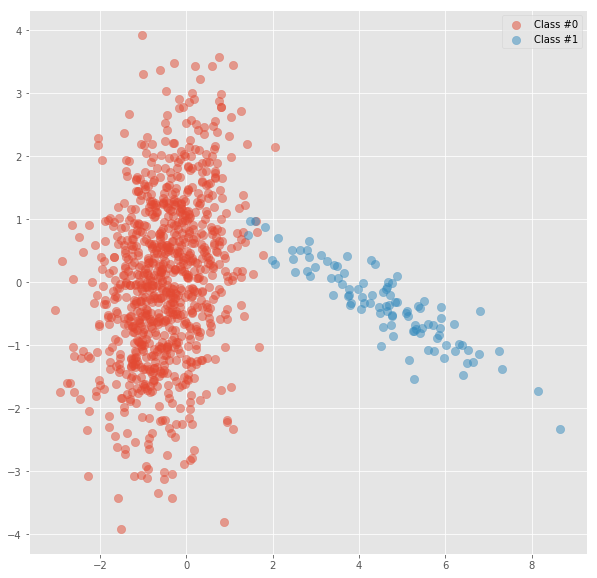

In [35]:
# Generate some data
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X)

# Plot the original data

def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    
# Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y)

In [36]:
y.mean()

0.10000000000000001

In [37]:
n_samples = y.shape[0]
print(n_samples)

1000


In [38]:
n_samples_0 = (y == 0).sum()
n_samples_0

900

In [39]:
n_samples_1 = (y == 1).sum()
n_samples_1

100

In [40]:
n_samples_1 / n_samples

0

In [41]:
#How many negatives cases should I select if I want a new dataset with 50% of positives?

#0.5 = n_samples_1 / (n_samples_1 + n_samples_0_new)

#(n_samples_1 + n_samples_0_new) = n_samples_1 / 0.5

In [42]:
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new

100.0

In [43]:
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.1111111111111111

In [44]:
#Create a filter to select n_samples_0_new_per from the negative class


# Select all negatives
filter_ = y == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [45]:
filter_.sum()

108

In [46]:
# Also select all the positives


filter_ = filter_ | (y == 1)

filter_ = filter_.astype(bool)

In [47]:
#Convert into a function

In [48]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

('Target percentage', 0.1)
('y.shape = ', 1000L, 'y.mean() = ', 0.10000000000000001)


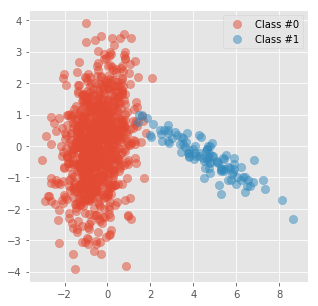

('Target percentage', 0.2)
('y.shape = ', 510L, 'y.mean() = ', 0.19607843137254902)


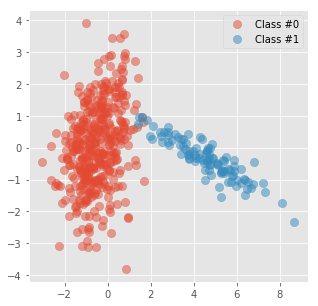

('Target percentage', 0.3)
('y.shape = ', 343L, 'y.mean() = ', 0.29154518950437319)


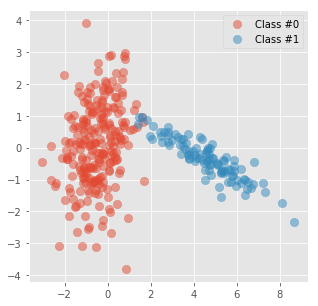

('Target percentage', 0.4)
('y.shape = ', 249L, 'y.mean() = ', 0.40160642570281124)


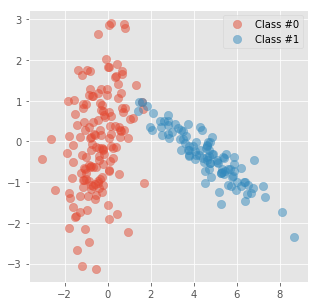

('Target percentage', 0.5)
('y.shape = ', 199L, 'y.mean() = ', 0.50251256281407031)


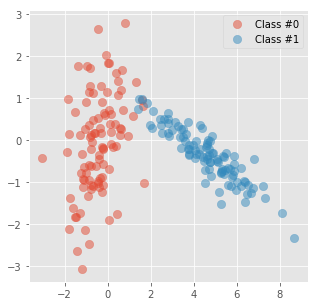

('Target percentage', 0.8)
('y.shape = ', 129L, 'y.mean() = ', 0.77519379844961245)


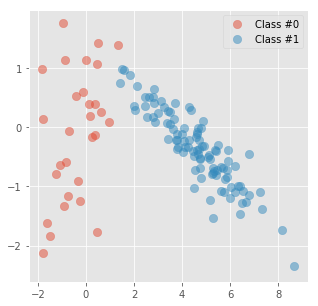

('Target percentage', 0.9)
('y.shape = ', 112L, 'y.mean() = ', 0.8928571428571429)


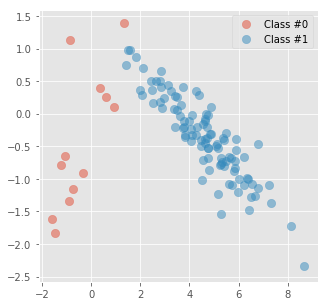

('Target percentage', 1)
('y.shape = ', 100L, 'y.mean() = ', 1.0)


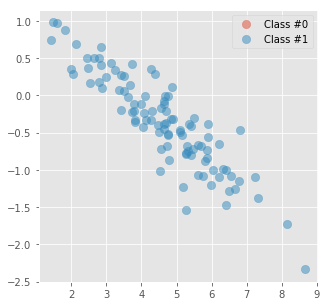

In [49]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5,0.8,0.9,1]:
    X_u, y_u = UnderSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()    

In [34]:
# Al cambiar el Target del porcentaje, al llegar a 1, se observa que (y.share) es menor. 

# Exercice 04.3

Now using random-over-sampling

('Target percentage', 0.1)
('y.shape = ', 1000L, 'y.mean() = ', 0.10000000000000001)


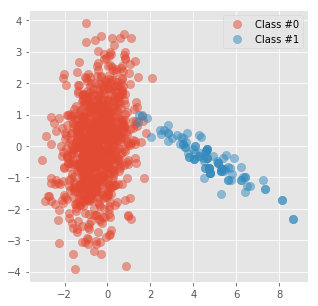

('Target percentage', 0.2)
('y.shape = ', 1125L, 'y.mean() = ', 0.20000000000000001)


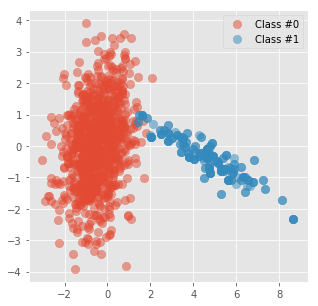

('Target percentage', 0.3)
('y.shape = ', 1285L, 'y.mean() = ', 0.29961089494163423)


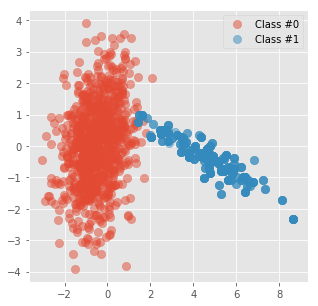

('Target percentage', 0.4)
('y.shape = ', 1500L, 'y.mean() = ', 0.40000000000000002)


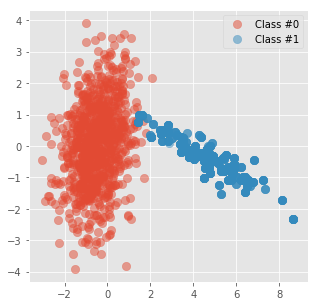

('Target percentage', 0.5)
('y.shape = ', 1800L, 'y.mean() = ', 0.5)


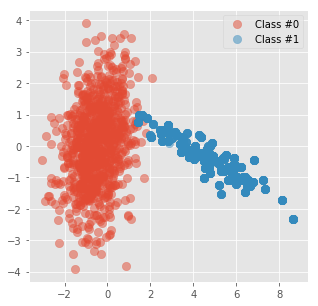

In [50]:
#Random over-sampling
#Replicate the minority class examples to increase their relevance

import random
def OverSampling(X, y, target_percentage=0.7, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()    

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [1]:
def SMOTE_MANUAL(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    #New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [2]:
#Fraude del 25% en rebalanceo

X_b3, y_b3 = SMOTE_MANUAL(x_train, y_train, target_percentage=0.25, k=5)
Fraude = (y_b3 == 1).sum()
No_Fraude = (y_b3 == 0).sum()
float(Fraude)/(float(Fraude)+float(No_Fraude))


NameError: name 'x_train' is not defined

In [ ]:
#Iniciamos y corremos el modelo logit

LogRed_2 = LogisticRegression()
LogRed_2.fit(X_b2, y_b2)


In [ ]:
# Se realiza la predicción

y_pred4=LogRed_2.predict(x_test)

In [ ]:
#Calculamos las métrica para los modelos

print('Accuracy',accuracy_score(y_test, y_pred4))
print('precision',precision_score(y_test, y_pred4))
print('recall',recall_score(y_test, y_pred4))
print('f1 score', f1_score(y_test, y_pred4))

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [51]:
#cargamos las siguientes algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {'LOG': LogisticRegression(),
          'DTC': DecisionTreeClassifier(),
          'GNB': GaussianNB(),
          'KNN': KNeighborsClassifier()}

for model in models.keys():
    models[model].fit(x_train, y_train)

In [55]:
# Realizamos la predicción para cada modelo
y_pred5 = pd.DataFrame(index=x_test.index, columns=models.keys())
for model in models.keys():
    y_pred5[model] = models[model].predict(x_test)

In [56]:
#Calculamos las metricas

for model in models.keys():
    print(model,'accuracy',accuracy_score(y_test,y_pred5[model]))
    print(model,'precision',precision_score(y_test,y_pred5[model]))
    print(model,'recall',recall_score(y_test,y_pred5[model]))
    print(model,'f1 score', f1_score(y_test,y_pred5[model]))

('DTC', 'accuracy', 0.98797612525590384)
('DTC', 'precision', 0.10727969348659004)
('DTC', 'recall', 0.13207547169811321)
('DTC', 'f1 score', 0.11839323467230445)
('GNB', 'accuracy', 0.92364695366338923)
('GNB', 'precision', 0.01704996034892942)
('GNB', 'recall', 0.20283018867924529)
('GNB', 'f1 score', 0.031455742501828816)
('KNN', 'accuracy', 0.99371413742394976)
('KNN', 'precision', 0.38461538461538464)
('KNN', 'recall', 0.04716981132075472)
('KNN', 'f1 score', 0.084033613445378158)
('LOG', 'accuracy', 0.99388714281595114)
('LOG', 'precision', 0.0)
('LOG', 'recall', 0.0)
('LOG', 'f1 score', 0.0)


# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [61]:
from sklearn.ensemble import RandomForestClassifier
Xb, yb = UnderSampling(x_train, y_train, target_percentage= 0.3)

RFmod = RandomForestClassifier()
RFmod.fit(Xb, yb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [63]:
#Realizamos la predicción

y_pred6=RFmod.predict(x_test)

In [64]:
#Calculamos las métricas desempeño para cada modelo

print('Accuracy',accuracy_score(y_test, y_pred6))
print('precision',precision_score(y_test, y_pred6))
print('recall',recall_score(y_test, y_pred6))
print('f1 score', f1_score(y_test, y_pred6))

('Accuracy', 0.90507770825524059)
('precision', 0.033333333333333333)
('recall', 0.51886792452830188)
('f1 score', 0.062642369020501146)


In [65]:
#de acuerdo a lo solicitado, cambiando a 100 n estimadores

RFmodel100 = RandomForestClassifier(n_estimators=100)
Mod7=RFmodel100.fit(Xb, yb)


In [66]:
#Realizamos la predicción

y_pred7=Mod7.predict(x_test)

In [68]:
#Calculamos las métricas desempeño para cada modelo

print('Accuracy',accuracy_score(y_test, y_pred7))
print('precision',precision_score(y_test, y_pred7))
print('recall',recall_score(y_test, y_pred7))
print('f1 score', f1_score(y_test, y_pred7))

('Accuracy', 0.90628874599925036)
('precision', 0.034905082669932641)
('recall', 0.53773584905660377)
('f1 score', 0.065554916618746406)
